In [41]:
# installing libraries
import pandas as pd

In [42]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35.0
1,CS4768,15-Mar-15,39.0
2,CS2122,26-Feb-13,52.0
3,CS1217,16-Nov-11,99.0
4,CS1850,20-Nov-13,78.0
...,...,...,...
49724,CS1227,10-Apr-13,103.0
49725,CS4287,14-Dec-13,51.0
49726,CS2758,31-Aug-14,73.0
49727,CS3182,26-Jun-13,71.0


In [43]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [44]:
df= trxn.merge(response, on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
49724,CS1227,10-Apr-13,103.0,0
49725,CS4287,14-Dec-13,51.0,0
49726,CS2758,31-Aug-14,73.0,0
49727,CS3182,26-Jun-13,71.0,0


In [45]:
#features

df.dtypes


customer_id     object
trans_date      object
tran_amount    float64
response         int64
dtype: object

In [46]:
df.shape

(49729, 4)

In [47]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0


In [48]:
df.tail()

,customer_id,trans_date,tran_amount,response
49724,CS1227,10-Apr-13,103.0,0
49725,CS4287,14-Dec-13,51.0,0
49726,CS2758,31-Aug-14,73.0,0
49727,CS3182,26-Jun-13,71.0,0
49728,CS4532,22-F,NaN,0


In [49]:
df.describe()

,tran_amount,response
count,49728.000000,49729.000000
mean,70.083736,0.129401
std,20.502866,0.335647
min,35.000000,0.000000
25%,52.000000,0.000000
50%,70.000000,0.000000
75%,88.000000,0.000000
max,105.000000,1.000000


In [50]:
# missing values
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    1
response       0
dtype: int64

In [51]:
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
49723,CS3394,28-Dec-14,78.0,0
49724,CS1227,10-Apr-13,103.0,0
49725,CS4287,14-Dec-13,51.0,0
49726,CS2758,31-Aug-14,73.0,0


In [52]:
# change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

C:\Users\user\AppData\Local\Temp\ipykernel_6640\415373954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\user\AppData\Local\Temp\ipykernel_6640\415373954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\user\AppData\Local\Temp\ipykernel_6640\415373954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35.0,1
1,CS4768,2015-03-15,39.0,1
2,CS2122,2013-02-26,52.0,0
3,CS1217,2011-11-16,99.0,0
4,CS1850,2013-11-20,78.0,0
...,...,...,...,...
49723,CS3394,2014-12-28,78.0,0
49724,CS1227,2013-04-10,103.0,0
49725,CS4287,2013-12-14,51.0,0
49726,CS2758,2014-08-31,73.0,0


In [53]:
set(df['response'])

{0, 1}

In [54]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount           float64
response                int64
dtype: object

In [55]:
# check for outliers
#z-score

from scipy import stats
import numpy as np

# calc z score
z_scores=np.abs(stats.zscore(df['tran_amount']))

# set a threshold

threshold= 3
outliers= z_scores>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [56]:
# check for outliers
#z-score

from scipy import stats
import numpy as np

# calc z score
z_scores=np.abs(stats.zscore(df['response']))

# set a threshold

threshold= 3
outliers= z_scores>threshold
#print outliers
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


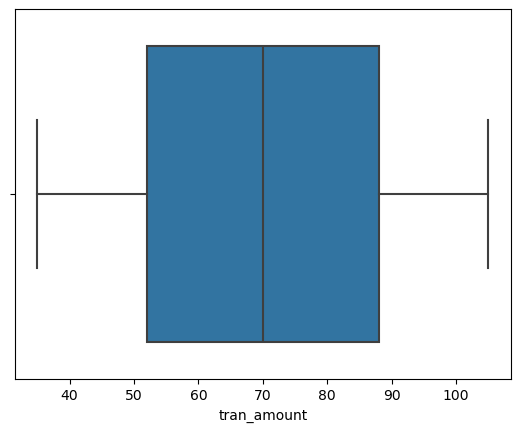

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

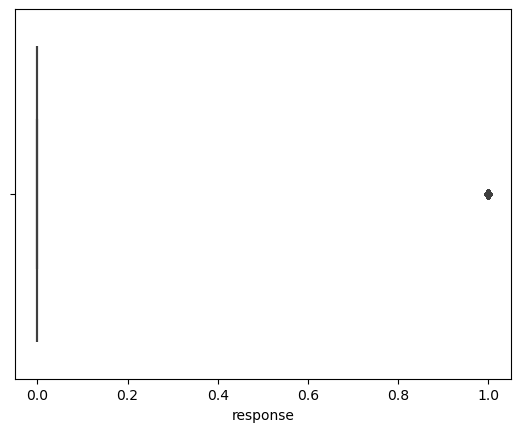

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

In [59]:
# creating new columns

df['month']= df['trans_date'].dt.month
df

C:\Users\user\AppData\Local\Temp\ipykernel_6640\1714070202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35.0,1,2
1,CS4768,2015-03-15,39.0,1,3
2,CS2122,2013-02-26,52.0,0,2
3,CS1217,2011-11-16,99.0,0,11
4,CS1850,2013-11-20,78.0,0,11
...,...,...,...,...,...
49723,CS3394,2014-12-28,78.0,0,12
49724,CS1227,2013-04-10,103.0,0,4
49725,CS4287,2013-12-14,51.0,0,12
49726,CS2758,2014-08-31,73.0,0,8


In [60]:
# Which 3 months have had the highest transaction amounts?

monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
# monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index()
monthly_Sales

,month,tran_amount
0,1,313978.0
1,10,312430.0
2,7,311462.0


In [61]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

# sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS3013,25
1,CS2657,23
2,CS1969,22
3,CS4303,22
4,CS5450,21


<Axes: xlabel='customer_id', ylabel='count'>

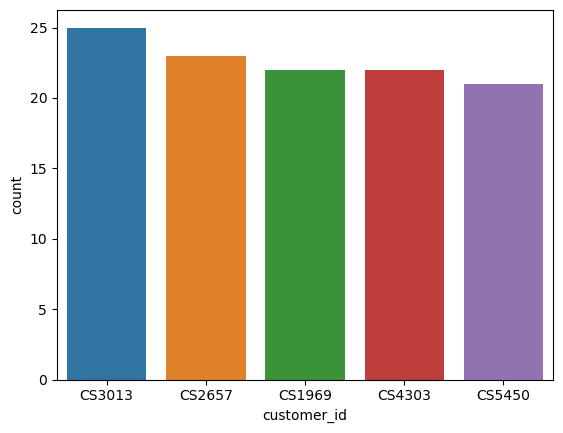

In [62]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [63]:
# Customers having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

# sort

top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
1545,CS2657,1799.0
1901,CS3013,1636.0
3191,CS4303,1540.0
3312,CS4424,1510.0
4338,CS5450,1500.0


<Axes: xlabel='customer_id', ylabel='tran_amount'>

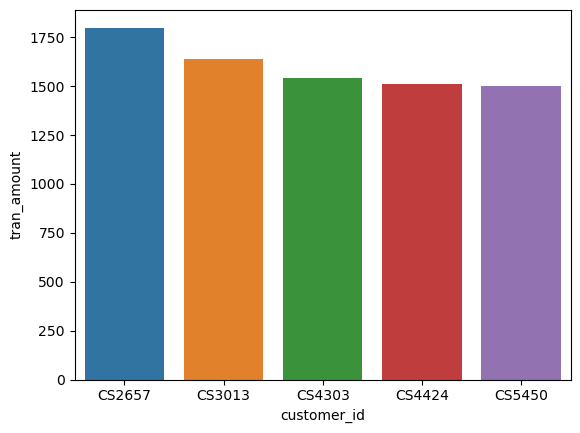

In [64]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

Advanced Analytics

Time Series Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_6640\3751294531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('m')


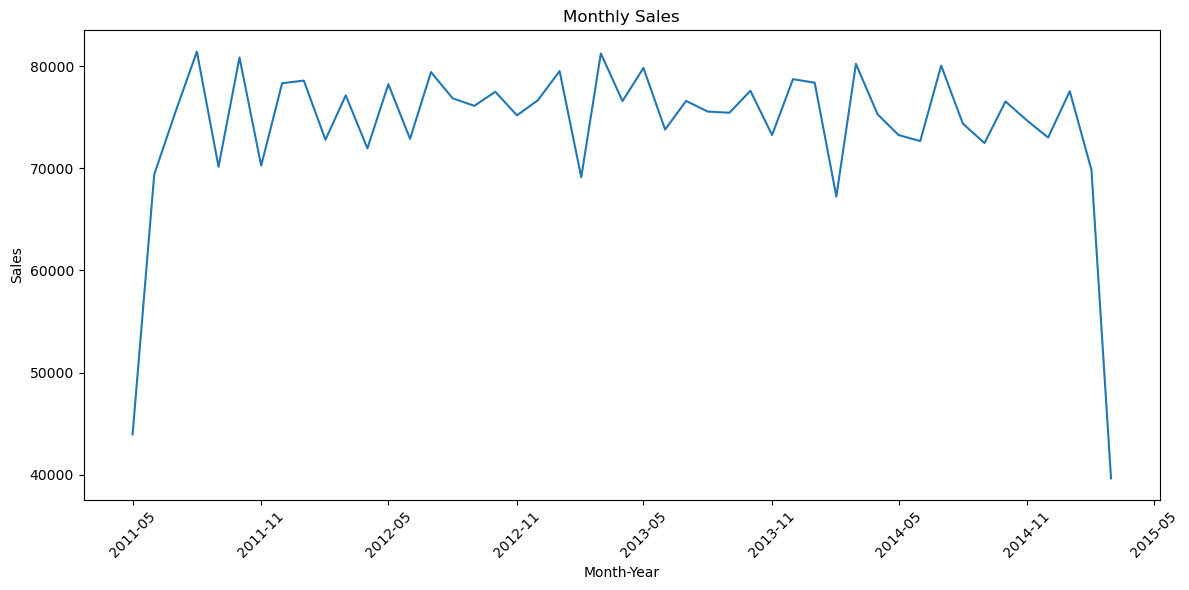

In [67]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('m')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

#df

In [68]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35.0,1,2,2013-02
1,CS4768,2015-03-15,39.0,1,3,2015-03
2,CS2122,2013-02-26,52.0,0,2,2013-02
3,CS1217,2011-11-16,99.0,0,11,2011-11
4,CS1850,2013-11-20,78.0,0,11,2013-11
...,...,...,...,...,...,...
49723,CS3394,2014-12-28,78.0,0,12,2014-12
49724,CS1227,2013-04-10,103.0,0,4,2013-04
49725,CS4287,2013-12-14,51.0,0,12,2013-12
49726,CS2758,2014-08-31,73.0,0,8,2014-08


Cohort Segmentation

In [70]:
# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [71]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,7,419.0
CS1113,2015-02-09,11,818.0
CS1114,2015-02-12,8,673.0
CS1115,2014-04-09,12,926.0
CS1116,2014-08-25,7,489.0
...,...,...,...
CS6107,2015-01-03,9,720.0
CS6108,2014-11-07,10,632.0
CS6109,2013-11-01,12,825.0


In [72]:
# customer segmentation

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [73]:
rfm


,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,7,419.0,P2
CS1113,2015-02-09,11,818.0,P2
CS1114,2015-02-12,8,673.0,P2
CS1115,2014-04-09,12,926.0,P2
CS1116,2014-08-25,7,489.0,P2
...,...,...,...,...
CS6107,2015-01-03,9,720.0,P2
CS6108,2014-11-07,10,632.0,P2
CS6109,2013-11-01,12,825.0,P2


   Churn Analysis

<Axes: xlabel='response'>

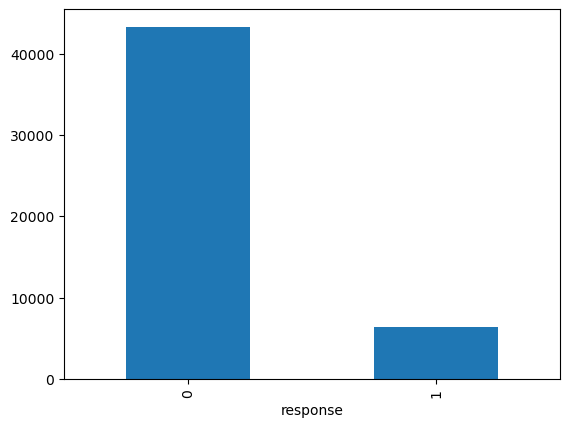

In [75]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')

Analyzing top customers

<Axes: xlabel='month_year'>

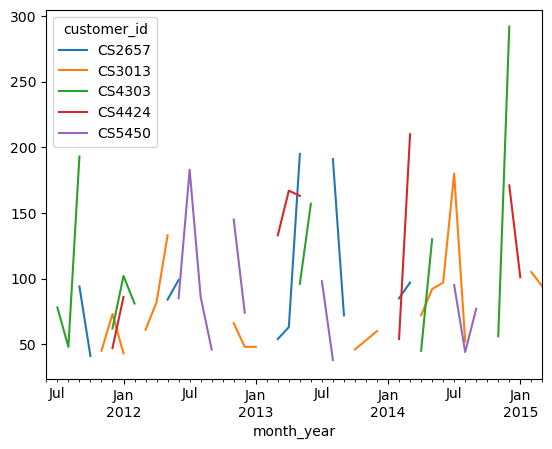

In [77]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

In [78]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35.0,1,2,2013-02
1,CS4768,2015-03-15,39.0,1,3,2015-03
2,CS2122,2013-02-26,52.0,0,2,2013-02
3,CS1217,2011-11-16,99.0,0,11,2011-11
4,CS1850,2013-11-20,78.0,0,11,2013-11
...,...,...,...,...,...,...
49723,CS3394,2014-12-28,78.0,0,12,2014-12
49724,CS1227,2013-04-10,103.0,0,4,2013-04
49725,CS4287,2013-12-14,51.0,0,12,2013-12
49726,CS2758,2014-08-31,73.0,0,8,2014-08


In [79]:
df.to_csv('MainData.csv')

In [80]:
rfm.to_csv('AddAnlys.csv')